<a href="https://colab.research.google.com/github/UtkarshGupta12/Wildfire/blob/master/Wildfire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **WILDFIRE CASE STUDY**


>> ## PROBlEM STATEMENT
To build a model based on the given dataset to predict wildfires.

>> ## DATASET INFORMATION
In [Cortez and Morais, 2007], the output 'area' was first transformed with a ln(x+1) function. 
Then, several Data Mining methods were applied. After fitting the models, the outputs were 
post-processed with the inverse of the ln(x+1) transform. Four different input setups were 
used. The experiments were conducted using a 10-fold (cross-validation) x 30 runs. Two 
regression metrics were measured: MAD and RMSE. A Gaussian support vector machine (SVM) fed 
with only 4 direct weather conditions (temp, RH, wind and rain) obtained the best MAD value: 
12.71 +- 0.01 (mean and confidence interval within 95% using a t-student distribution). The 
best RMSE was attained by the naive mean predictor. An analysis to the regression error curve 
(REC) shows that the SVM model predicts more examples within a lower admitted error. In effect, 
the SVM model predicts better small fires, which are the majority.



>> ## COLUMNS DESCRIPTION 
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
3. month - month of the year: 'jan' to 'dec' 
4. day - day of the week: 'mon' to 'sun' 
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20 
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10 
9. temp - temperature in Celsius degrees: 2.2 to 33.30 
10. RH - relative humidity in %: 15.0 to 100 
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

### Importing Data

In [0]:
#Importing pandas , numpy and matplotlib libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#importing data
df = pd.read_csv('https://raw.githubusercontent.com/UtkarshGupta12/Wildfire/master/forestfires%20(1).csv')

### Inspecting the Dataframe

In [9]:
#To view the head of our dataset
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [10]:
#To check the dimensions of the dataframe
df.shape

(517, 13)

In [95]:
#To look at the statistical aspects of the dataframe
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [11]:
#To see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [12]:
#To check if there are any null values in the given dataset
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [13]:
#To count the number of unique values in the given column
df['X'].value_counts()

4    91
6    86
2    73
8    61
7    60
3    55
1    48
5    30
9    13
Name: X, dtype: int64

In [14]:
#To count the number of unique values in the given column
df['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
may      2
jan      2
nov      1
Name: month, dtype: int64

In [15]:
#To count the number of unique values in the given column
df['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [16]:
#To count the number of unique values in the given column
df['FFMC'].value_counts().head()

91.6    28
92.1    28
91.0    22
91.7    19
93.7    16
Name: FFMC, dtype: int64

In [17]:
#To count the number of unique values in the given column
df['area'].value_counts().head()

0.00    247
1.94      3
3.71      2
0.90      2
1.95      2
Name: area, dtype: int64

In [0]:
#Importing seaborn library
import seaborn as sns

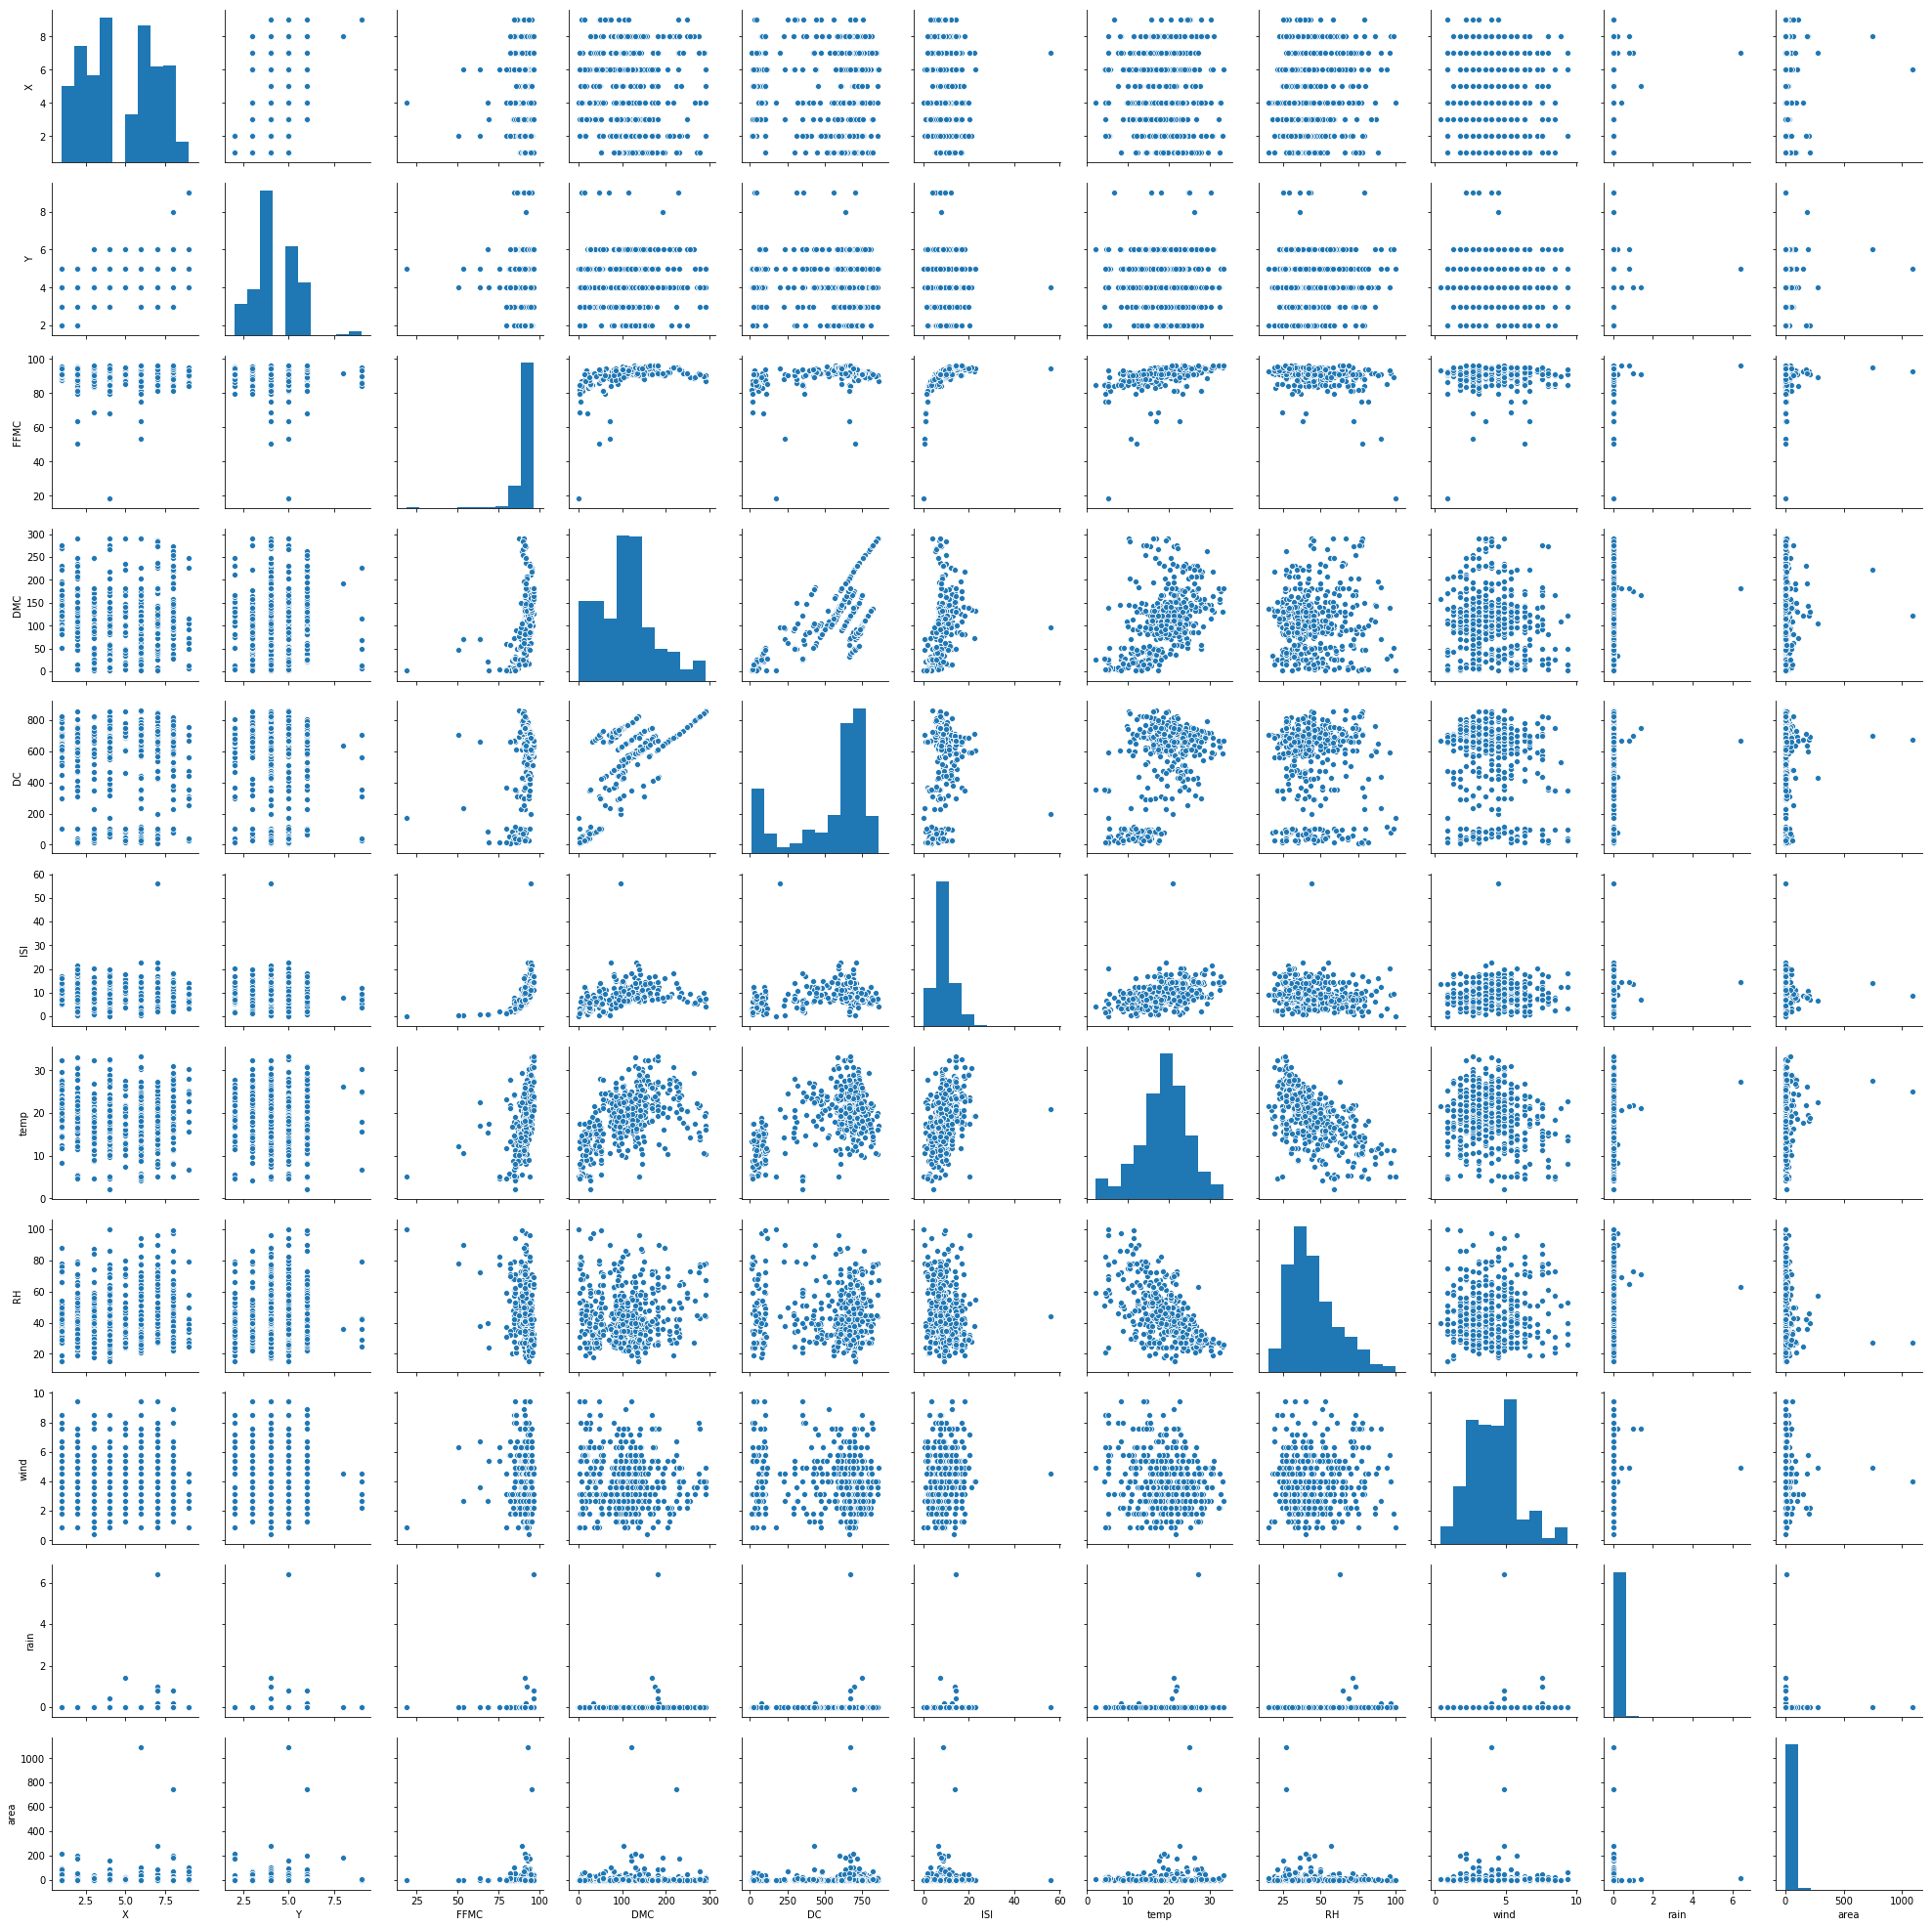

In [20]:
#To look at the pair-wise realtionship in each column
sns.pairplot(df)
plt.show()

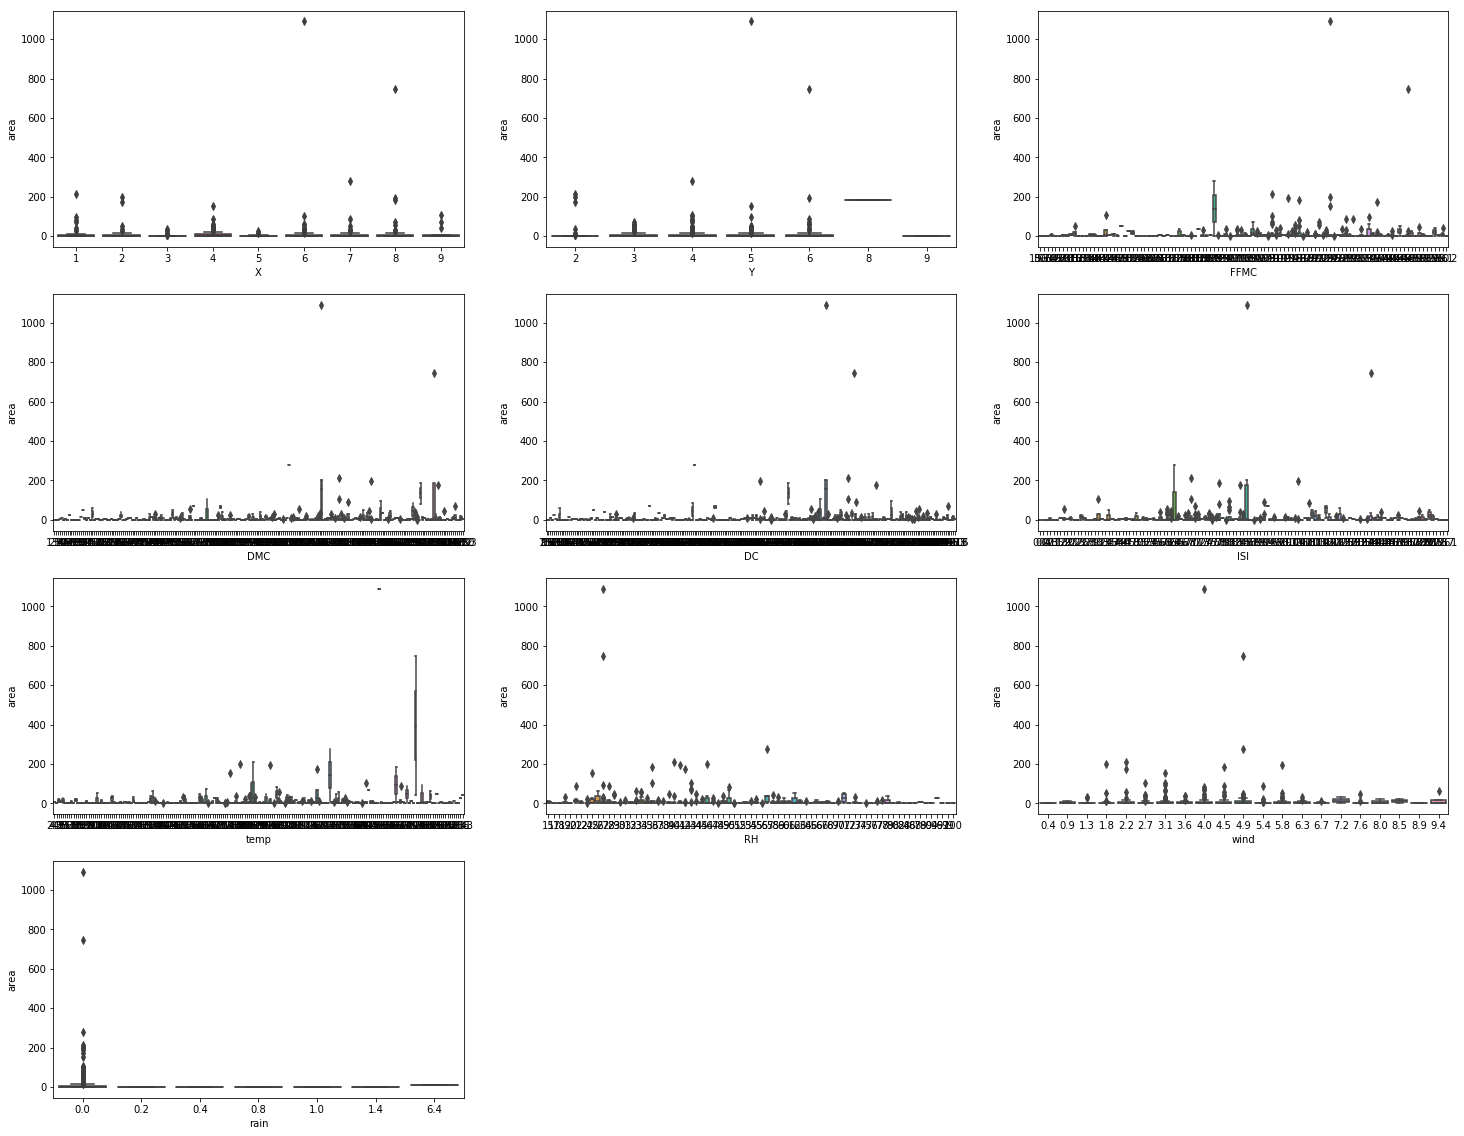

In [21]:
#To get an ide of the outliers and percentiles in each column w.r.t area
plt.figure(figsize=(25,20))
plt.subplot(4,3,1)
sns.boxplot(x='X',y='area',data = df)
plt.subplot(4,3,2)
sns.boxplot(x='Y',y='area',data = df)
plt.subplot(4,3,3)
sns.boxplot(x='FFMC',y='area',data = df)
plt.subplot(4,3,4)
sns.boxplot(x='DMC',y='area',data = df)
plt.subplot(4,3,5)
sns.boxplot(x='DC',y='area',data = df)
plt.subplot(4,3,6)
sns.boxplot(x='ISI',y='area',data = df)
plt.subplot(4,3,7)
sns.boxplot(x='temp',y='area',data = df)
plt.subplot(4,3,8)
sns.boxplot(x='RH',y='area',data = df)
plt.subplot(4,3,9)
sns.boxplot(x='wind',y='area',data = df)
plt.subplot(4,3,10)
sns.boxplot(x='rain',y='area',data = df)

### DATA PREPARATION

In [23]:
#Dropping useless variables
df2 = df
df2 = df2.drop('day',axis =1)
df2.head()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [24]:
# Creating a dummy variable for some of the categorical variables and dropping the first one
status = pd.get_dummies(df['month'],drop_first = True)
status.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [25]:
# Adding the results to df2
df2 = pd.concat([status,df],axis=1)
df2.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0,0,0,0,0,0,1,0,0,0,0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,0,0,0,0,0,0,0,0,0,1,0,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,0,0,0,0,0,0,0,0,0,1,0,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,0,0,0,0,0,0,1,0,0,0,0,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,0,0,0,0,0,0,1,0,0,0,0,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [0]:
#Dropping the month column after getting dummies
df2 = df2.drop('month',axis=1)

In [0]:
#Dropping the useless column
df2 = df2.drop('day',axis=1)

In [0]:
#This step was taken to make binary outcomes based on that if there is fire or not rather than how much area was in fire to  make logistic predictions.
df2['Wildfire']=df2['area'].where(df2['area']==0,1)

In [29]:
#To look at the head of the dataframe df2 
df2.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Wildfire
0,0,0,0,0,0,0,1,0,0,0,0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,1,0,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,1,0,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0
3,0,0,0,0,0,0,1,0,0,0,0,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0
4,0,0,0,0,0,0,1,0,0,0,0,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0


In [0]:
#To drop the area column as it was highly correlated witht he outcome.
df2 = df2.drop('area',axis = 1)

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 22 columns):
aug         517 non-null uint8
dec         517 non-null uint8
feb         517 non-null uint8
jan         517 non-null uint8
jul         517 non-null uint8
jun         517 non-null uint8
mar         517 non-null uint8
may         517 non-null uint8
nov         517 non-null uint8
oct         517 non-null uint8
sep         517 non-null uint8
X           517 non-null int64
Y           517 non-null int64
FFMC        517 non-null float64
DMC         517 non-null float64
DC          517 non-null float64
ISI         517 non-null float64
temp        517 non-null float64
RH          517 non-null int64
wind        517 non-null float64
rain        517 non-null float64
Wildfire    517 non-null float64
dtypes: float64(8), int64(3), uint8(11)
memory usage: 50.1 KB


In [32]:
#To look at the correlation among the columns
df2.corr()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,Wildfire
aug,1.000000,-0.098941,-0.149116,-0.046323,-0.190937,-0.137065,-0.253859,-0.046323,-0.032724,-0.128493,-0.524858,-0.059669,-0.010404,0.228103,0.497928,0.279361,0.334639,0.351404,0.054761,0.028577,0.093101,0.023512
dec,-0.098941,1.000000,-0.026701,-0.008295,-0.034190,-0.024543,-0.045456,-0.008295,-0.005860,-0.023008,-0.093982,-0.006547,0.075850,-0.137044,-0.176301,-0.105642,-0.162322,-0.329648,-0.047714,0.269702,-0.009752,0.127308
feb,-0.149116,-0.026701,1.000000,-0.012501,-0.051528,-0.036989,-0.068508,-0.012501,-0.008831,-0.034676,-0.141642,0.041721,0.016358,-0.281535,-0.317899,-0.399277,-0.249777,-0.320015,0.140430,-0.029431,-0.014698,-0.008933
jan,-0.046323,-0.008295,-0.012501,1.000000,-0.016007,-0.011491,-0.021282,-0.003883,-0.002743,-0.010772,-0.044001,-0.045002,0.010153,-0.454771,-0.105647,-0.115064,-0.103588,-0.146520,0.170923,-0.070245,-0.004566,-0.065155
jul,-0.190937,-0.034190,-0.051528,-0.016007,1.000000,-0.047363,-0.087722,-0.016007,-0.011308,-0.044402,-0.181367,0.061062,0.061449,0.031833,-0.001946,-0.100887,0.020982,0.142588,0.013185,-0.040645,-0.013390,0.020701
jun,-0.137065,-0.024543,-0.036989,-0.011491,-0.047363,1.000000,-0.062972,-0.011491,-0.008117,-0.031874,-0.130195,0.129616,0.078594,-0.040634,-0.050403,-0.186183,0.111516,0.051015,0.009382,0.012124,-0.013510,-0.019068
mar,-0.253859,-0.045456,-0.068508,-0.021282,-0.087722,-0.062972,1.000000,-0.021282,-0.015034,-0.059034,-0.241135,0.007827,0.050495,-0.074327,-0.407404,-0.650427,-0.143520,-0.341797,-0.089836,0.181433,-0.020744,-0.116497
may,-0.046323,-0.008295,-0.012501,-0.003883,-0.016007,-0.011491,-0.021282,1.000000,-0.002743,-0.010772,-0.044001,0.008917,-0.015206,-0.037230,-0.081980,-0.114209,-0.060493,-0.045540,0.086822,0.015054,-0.004566,-0.002775
nov,-0.032724,-0.005860,-0.008831,-0.002743,-0.011308,-0.008117,-0.015034,-0.002743,1.000000,-0.007610,-0.031083,0.025344,-0.046570,-0.088964,-0.074218,-0.078380,-0.076559,-0.053798,-0.035885,0.011864,-0.003225,-0.046027
oct,-0.128493,-0.023008,-0.034676,-0.010772,-0.044402,-0.031874,-0.059034,-0.010772,-0.007610,1.000000,-0.122053,0.089545,0.004717,-0.005998,-0.187632,0.093279,-0.071154,-0.053513,-0.072334,-0.053850,-0.012665,-0.065375


In [0]:
# Checking for outliers in the continuous variables
num_wildfire = df2[['FFMC','DMC','DC','ISI','temp','RH','wind','rain']]

In [34]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_wildfire.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000
90%,94.300000,195.180000,758.100000,14.300000,25.980000,68.000000,6.300000,0.000000
95%,95.100000,231.100000,795.300000,17.000000,27.900000,77.000000,7.600000,0.000000
99%,96.100000,286.832000,848.452000,20.300000,32.092000,90.000000,8.500000,0.368000


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# Putting feature variable to X
X = df2.drop('Wildfire',axis = 1)

In [37]:
X.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0,0,0,0,0,0,1,0,0,0,0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,0,0,0,0,0,0,0,0,0,1,0,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,0,0,0,0,0,0,0,0,0,1,0,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,0,0,0,0,0,0,1,0,0,0,0,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,0,0,0,0,0,0,1,0,0,0,0,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [38]:
# Putting response variable to y
y = df2['Wildfire']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Wildfire, dtype: float64

In [0]:
# Splitting the data into train and test and making the train size to 80% as the dataset has really small number of observations.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### FEATURE SCALING

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [42]:
X_train[['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain']] = scaler.fit_transform(X_train[['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [43]:
X_train.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
412,0,0,0,0,1,0,0,0,0,0,0,1.868908,-0.231839,0.305402,-0.259686,-0.401289,0.225021,0.687169,-1.039918,0.250139,-0.077782
332,0,0,0,0,0,0,0,0,0,0,1,-0.300454,-0.231839,0.118541,0.249626,0.999020,-0.090255,-0.294304,-0.174766,-1.025262,-0.077782
423,0,0,0,0,0,0,0,0,0,0,1,-1.602071,-1.023157,0.118541,-0.224996,0.797220,-0.114507,0.601074,0.257810,-0.027122,-0.077782
387,0,0,0,0,0,0,1,0,0,0,0,0.133418,0.559479,0.067579,-1.413915,-2.032736,-0.211515,-1.241339,0.257810,0.749209,-0.077782
153,0,0,0,0,0,0,0,0,0,0,1,0.133418,-0.231839,0.645150,-0.370063,0.590662,1.704395,0.222260,0.196013,0.471948,-0.077782


In [44]:
#### Checking the Fire Rate
fire = (sum(df2['Wildfire'])/len(df2['Wildfire'].index))*100
fire

52.22437137330754

In [0]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

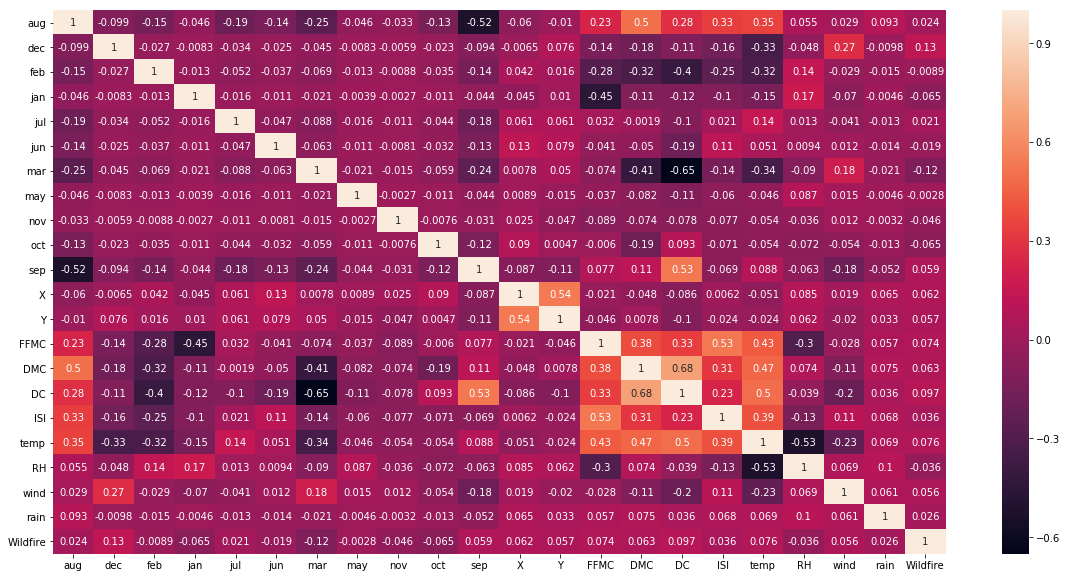

In [46]:
#To see the correlation matrix 
plt.figure(figsize = (20,10))        
# Size of the figure
sns.heatmap(df2.corr(),annot = True)
plt.show()

### Dropping highly correlated dummy variables

In [0]:
df2 = df2.drop('nov',axis = 1)

In [0]:
df2 = df2.drop('jan',axis = 1)

In [0]:
df2 = df2.drop('may',axis = 1)

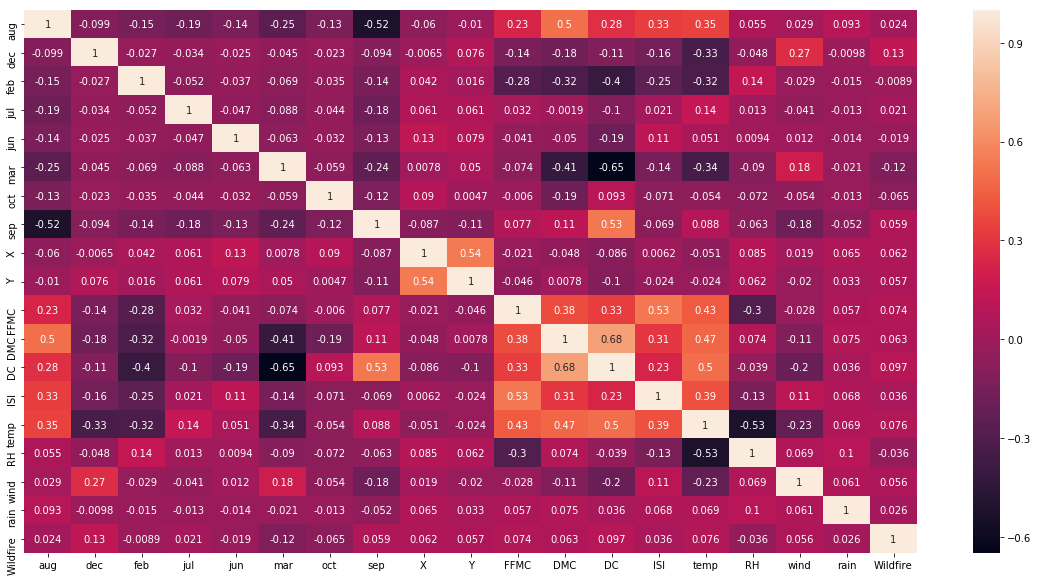

In [50]:
#To see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df2.corr(),annot = True)
plt.show()

In [51]:
df2.head()

,aug,dec,feb,jul,jun,mar,oct,sep,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,Wildfire
0,0,0,0,0,0,1,0,0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,0,0,0,0,0,0,1,0,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,0,0,0,0,0,0,1,0,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,0,0,0,0,0,1,0,0,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,0,0,0,0,0,1,0,0,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [0]:
X_test = X_test.drop(['nov','jan','may'], 1)
X_train = X_train.drop(['nov','jan','may'], 1)

In [0]:
num_vars=['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain']

### Running the Training Model


In [0]:
import statsmodels.api as sm

In [55]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Wildfire   No. Observations:                  413
Model:                            GLM   Df Residuals:                      394
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -270.97
Date:                Thu, 22 Aug 2019   Deviance:                       541.94
Time:                        07:43:52   Pearson chi2:                     403.
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1862      1.125     -0.166      0.869      -2.391       2.019
aug            0.2249      1.291      0.174      0.862      -2.305       2.755
dec           23.3888   1.59e+04      0.001      0.999   -3.12e+04    3.12e+04
feb            0.2873      0.824      0.349      0.727      -1.328       1.902
jul            0.3731      1.100      0.339      0.734      -1.783       2.529
jun           -0.0366      0.990     -0.037      0.971      -1.977       1.903
mar           -0.3399      0.758     -0.449      0.654      -1.825       1.145
oct           -0.4788      1.556     -0.308      0.758      -3.529       2.571
sep            0.4521      1.450      0.312      0.755      -2.389       3.293
X              0.2129      0.125      1.702      0.089      -0.032       0.458
Y             -0.0171      0.127     -0.135      0.893      -0.266       0.231
FFMC           0.1901      0.176      1.078      0.281      -0.156       0.536
DMC           -0.0971      0.200     -0.485      0.628      -0.490       0.295
DC            -0.0751      0.529     -0.142      0.887      -1.113       0.963
ISI           -0.0441      0.146     -0.302      0.763      -0.330       0.242
temp           0.3170      0.218      1.455      0.146      -0.110       0.744
RH             0.1620      0.167      0.972      0.331      -0.165       0.489
wind           0.0809      0.117      0.691      0.490      -0.149       0.310
rain           0.0196      0.122      0.161      0.872      -0.219       0.258
==============================================================================
"""

### Feature Scaling using RFE

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [57]:
from sklearn.feature_selection import RFE
# running RFE with 10 variables as output
rfe = RFE(logreg,10)             
rfe = rfe.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [58]:
rfe.support_

array([False,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True, False, False, False,  True, False,  True, False])

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('aug', False, 8),
 ('dec', True, 1),
 ('feb', False, 5),
 ('jul', True, 1),
 ('jun', True, 1),
 ('mar', True, 1),
 ('oct', True, 1),
 ('sep', True, 1),
 ('X', True, 1),
 ('Y', False, 9),
 ('FFMC', True, 1),
 ('DMC', False, 2),
 ('DC', False, 6),
 ('ISI', False, 4),
 ('temp', True, 1),
 ('RH', False, 3),
 ('wind', True, 1),
 ('rain', False, 7)]

In [0]:
col = X_train.columns[rfe.support_]

In [62]:
X_train.columns[~rfe.support_]

Index(['aug', 'feb', 'Y', 'DMC', 'DC', 'ISI', 'RH', 'rain'], dtype='object')

In [63]:
#Assessing the model with stats model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Wildfire   No. Observations:                  413
Model:                            GLM   Df Residuals:                      402
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -271.79
Date:                Thu, 22 Aug 2019   Deviance:                       543.57
Time:                        07:43:52   Pearson chi2:                     403.
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0536      0.160      0.335      0.738      -0.260       0.368
dec           22.8461    1.6e+04      0.001      0.999   -3.13e+04    3.13e+04
jul            0.2678      0.440      0.608      0.543      -0.595       1.131
jun           -0.1664      0.570     -0.292      0.770      -1.283       0.950
mar           -0.5306      0.380     -1.396      0.163      -1.276       0.215
oct           -0.7674      0.640     -1.199      0.230      -2.022       0.487
sep            0.1619      0.235      0.689      0.491      -0.299       0.623
X              0.2119      0.103      2.067      0.039       0.011       0.413
FFMC           0.1187      0.129      0.918      0.359      -0.135       0.372
temp           0.1450      0.133      1.088      0.277      -0.116       0.406
wind           0.0747      0.111      0.671      0.502      -0.143       0.293
==============================================================================
"""

In [64]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

412    0.705165
332    0.511674
423    0.493836
387    0.362448
153    0.595781
451    0.395176
125    0.325994
302    0.443292
484    0.562096
509    0.573525
dtype: float64

In [65]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.70516516, 0.51167407, 0.49383621, 0.36244848, 0.59578088,
       0.39517555, 0.32599372, 0.44329176, 0.56209628, 0.57352507])

In [66]:
## Creating a dataframe with the actual wildfire and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Wildfire':y_train.values, 'Wildfire_Prob':y_train_pred})
y_train_pred_final.head()

,Wildfire,Wildfire_Prob
0,1.0,0.705165
1,1.0,0.511674
2,1.0,0.493836
3,0.0,0.362448
4,1.0,0.595781


In [67]:
## Creating new column 'Predicted' with 1 if Wildfire_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Wildfire_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Wildfire,Wildfire_Prob,predicted
0,1.0,0.705165,1
1,1.0,0.511674,1
2,1.0,0.493836,0
3,0.0,0.362448,0
4,1.0,0.595781,1


In [0]:
from sklearn import metrics

In [69]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Wildfire, y_train_pred_final.predicted )
print(confusion)

[[ 92 105]
 [ 73 143]]


In [70]:
# To check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Wildfire, y_train_pred_final.predicted))

0.5690072639225182


### Checking VIFs

In [0]:
# To Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,1.70
7,FFMC,1.27
0,dec,1.25
9,wind,1.20
3,mar,1.18
5,sep,1.04
1,jul,1.03
6,X,1.03
2,jun,1.02
4,oct,1.01


It can be observed that all the columns have VIF values under 5 so there is no need to drop any particular column.

In [0]:
### To draw the curve to look at the actual and calculated probabilities
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [0]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Wildfire, y_train_pred_final.Wildfire_Prob, drop_intermediate = False )

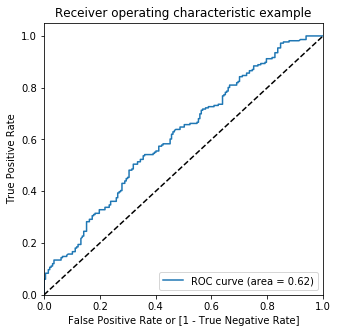

In [75]:
draw_roc(y_train_pred_final.Wildfire, y_train_pred_final.Wildfire_Prob)

### To make Final Predictions

In [0]:
X_test[['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain']] = scaler.fit_transform(X_test[['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain']])

In [77]:
X_test = X_test[col]
X_test.head()

,dec,jul,jun,mar,oct,sep,X,FFMC,temp,wind
217,0,0,0,0,0,1,-1.531396,-0.719340,-1.180941,1.391210
260,0,0,0,0,0,0,-1.103264,0.658402,1.577647,0.061696
142,0,0,0,0,0,0,1.465529,-0.306018,0.345825,2.894140
152,0,1,0,0,0,0,-0.675132,-0.306018,0.935711,-1.210014
255,0,0,0,0,0,0,-1.103264,-1.022443,0.536670,0.061696


In [0]:
X_test_sm = sm.add_constant(X_test)

In [0]:
y_test_pred = res.predict(X_test_sm)

In [80]:
y_test_pred[:10]

217    0.434956
260    0.532821
142    0.644316
152    0.546709
255    0.445448
31     0.554242
375    0.572482
240    0.481343
190    0.369930
104    0.296846
dtype: float64

In [0]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [82]:
# To see the head
y_pred_1.head()

,0
217,0.434956
260,0.532821
142,0.644316
152,0.546709
255,0.445448


In [0]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [0]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [0]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [87]:
y_pred_final.head()

,Wildfire,CustID,0
0,1.0,217,0.434956
1,1.0,260,0.532821
2,1.0,142,0.644316
3,1.0,152,0.546709
4,0.0,255,0.445448


In [0]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Wildfire_Prob'})

In [0]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Wildfire','Wildfire_Prob'], axis=1)

In [90]:
# To see the head of y_pred_final
y_pred_final.head()

,Wildfire,Wildfire_Prob
0,1.0,0.434956
1,1.0,0.532821
2,1.0,0.644316
3,1.0,0.546709
4,0.0,0.445448


In [0]:
y_pred_final['final_predicted'] = y_pred_final.Wildfire_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [92]:
y_pred_final.head()

,Wildfire,Wildfire_Prob,final_predicted
0,1.0,0.434956,1
1,1.0,0.532821,1
2,1.0,0.644316,1
3,1.0,0.546709,1
4,0.0,0.445448,1


In [93]:
# To check the overall accuracy.
metrics.accuracy_score(y_pred_final.Wildfire, y_pred_final.final_predicted)

0.5865384615384616

It can be seen that our model had an overall accuracy of 58% on the test set which I think is pretty decent as the No. of observations was very less and having a chance of predicting wildfire with an accuracy of 58% can save the day many times. 